### Testing Data

### Preparing the data for model inference

In [1]:
import cv2
import os

# Create a folder to store the captured images
output_folder = 'awake_test'
os.makedirs(output_folder, exist_ok=True)

# Initialize the RealSense camera capture
# Replace '0' with the appropriate index for the RealSense camera
cap = cv2.VideoCapture(0)

# Check if the camera is opened successfully
if not cap.isOpened():
    print("Error: Unable to open RealSense camera.")
else:
    count = 0  # Counter for captured images
    while True:
        if(count==10):
            break
        # Capture frame-by-frame
        ret, frame = cap.read()

        # Display the frame
        cv2.imshow('RealSense Camera Feed', frame)

        # Check for the Enter key press to capture an image
        if cv2.waitKey(1) == 13:  # 13 is the ASCII code for Enter key
            # Save the captured image
            img_name = f'image_{count}.png'
            img_path = os.path.join(output_folder, img_name)
            cv2.imwrite(img_path, frame)
            print(f"Saved {img_name}")
            count += 1

        # Check for the 'q' key press to quit
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

# Release the camera capture
cap.release()

# Close all OpenCV windows
cv2.destroyAllWindows()

In [4]:
import os
import cv2
import torch
from torch.utils.data import DataLoader, Dataset
from torchvision.transforms import Resize, ToTensor, Normalize, Compose
from PIL import Image

# Define the preprocessing transformation for input frames
preprocess = Compose([
    ToTensor(),
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Define a custom dataset class for your data
class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.classes = sorted(os.listdir(root_dir))

    def __len__(self):
        return sum(len(files) for _, _, files in os.walk(self.root_dir))

    def __getitem__(self, idx):
        class_name = self.classes[idx // 10]  # Assuming there are 10 images per class
        class_dir = os.path.join(self.root_dir, class_name)
        img_idx = idx % 10
        img_name = os.listdir(class_dir)[img_idx]
        img_path = os.path.join(class_dir, img_name)
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
        image_pil = Image.fromarray(image)  # Convert numpy array to PIL Image
        if self.transform:
            image = self.transform(image_pil)
        label = 0 if class_name == 'Awake_Test_File' else 1
        return image, label

# Define paths to your dataset directories
test_data_dir = 'Test_Data'

# Create custom dataset for training
test_dataset = CustomDataset(test_data_dir, transform=preprocess)

# Define data loader
test_loader = DataLoader(test_dataset, batch_size=10, shuffle=False)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

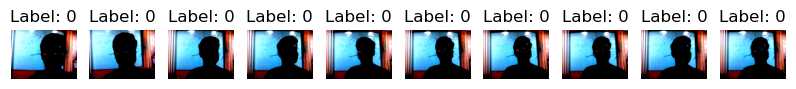

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

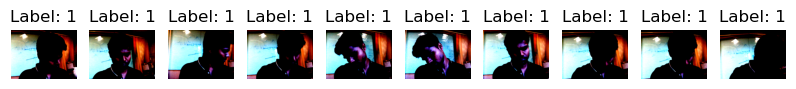

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming test_loader is your DataLoader
for batch in test_loader:
    images, labels = batch

    # Convert torch tensors to numpy arrays
    images = images.numpy()
    labels = labels.numpy()

    # Display images with labels
    num_images = len(images)
    fig, axes = plt.subplots(1, num_images, figsize=(10, 2))
    for i in range(num_images):
        axes[i].imshow(np.transpose(images[i], (1, 2, 0)))
        axes[i].set_title(f"Label: {labels[i]}")
        axes[i].axis('off')

    plt.show()


In [6]:
import os
import cv2
import time
import torch
import torchvision.transforms as transforms
from torchvision.models import resnet18
from torch.nn import Sequential, Linear, ReLU
from torch.optim import Adam
from torch.utils.data import DataLoader, Dataset

In [7]:
# Define the file path where the model is saved
model_path = "resnet_model_for_awake_dr_pred.pth"


# Define the model architecture
model_loaded = Sequential(
    resnet18(pretrained=True),
    Linear(1000, 2)  # Assuming 2 output classes
)

# Load the model state dictionary
model_loaded.load_state_dict(torch.load(model_path))

print(f"Model loaded from {model_path}")

C:\Users\Public\Anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Public\Anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Model loaded from resnet_model_for_awake_dr_pred.pth


In [12]:
import os
import cv2
import time
import torch
import torchvision.transforms as transforms
from torchvision.models import resnet18
from torch.nn import Sequential, Linear, ReLU
from torch.optim import Adam
from torch.utils.data import DataLoader, Dataset

from torchvision.transforms import ToTensor, Normalize, Compose, Resize
from PIL import Image


# Define the preprocessing transformation for input frames
preprocess = transforms.Compose([
    transforms.ToPILImage(),
    Resize((224, 224)),
    ToTensor(),
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Define a custom dataset class for your data
class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.classes = sorted(os.listdir(root_dir))

    def __len__(self):
        return sum(len(files) for _, _, files in os.walk(self.root_dir))

    def __getitem__(self, idx):
        class_name = self.classes[idx // 10]  # Assuming there are 12 images per class
        class_dir = os.path.join(self.root_dir, class_name)
        img_idx = idx % 10    ## chnages here
        img_name = os.listdir(class_dir)[img_idx]
        img_path = os.path.join(class_dir, img_name)
        image = cv2.imread(img_path)
        if self.transform:
            image = self.transform(image)
        label = 0 if class_name == 'awake' else 1
        return image, label

# Define paths to your dataset directories
test_data_dir = 'Test_Data'

# Create custom dataset for training
test_dataset = CustomDataset(test_data_dir, transform=preprocess)

# Define data loader
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=True)




In [13]:
from torch import nn

criterion = nn.CrossEntropyLoss()
# Evaluation mode
model_loaded.eval()

# Define a function for performance evaluation
def evaluate_model(model, dataloader):
    total_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    with torch.no_grad():
        for inputs, labels in dataloader:
            # Move inputs and labels to device
            inputs, labels = inputs, labels

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Compute statistics
            total_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            correct_predictions += (predicted == labels).sum().item()
            total_predictions += labels.size(0)

    # Calculate average loss and accuracy
    average_loss = total_loss / total_predictions
    accuracy = correct_predictions / total_predictions

    return average_loss, accuracy

# Evaluate the model on the test data
test_loss, test_accuracy = evaluate_model(model_loaded, test_loader)

print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

Test Loss: 0.1133, Test Accuracy: 0.9500


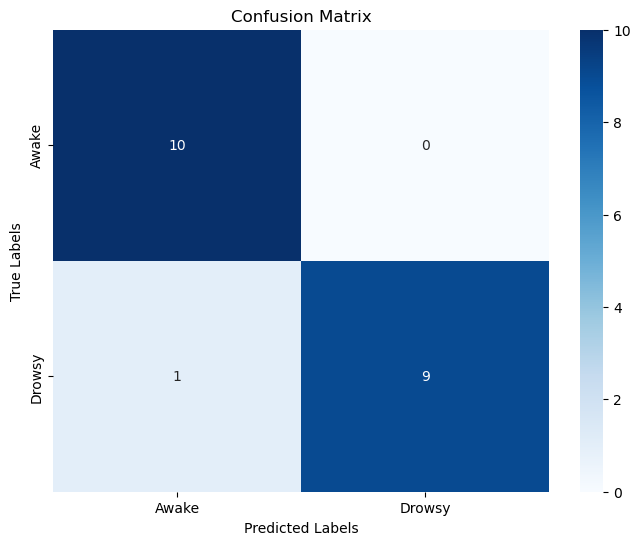

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Evaluate the model and get predictions
predicted_labels = []
true_labels = []

model_loaded.eval()

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model_loaded(inputs)
        _, predicted = torch.max(outputs, 1)
        predicted_labels.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Awake', 'Drowsy'], yticklabels=['Awake', 'Drowsy'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### Loading the compressed Model

In [15]:
# Define the file path where the model is saved
model_path = "model_bf16.pth"


# Define the model architecture
model_loaded_comp = Sequential(
    resnet18(pretrained=True),
    Linear(1000, 2)  # Assuming 2 output classes
)

# Load the model state dictionary
model_loaded_comp.load_state_dict(torch.load(model_path))

print(f"Model loaded from {model_path}")

C:\Users\Public\Anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Public\Anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Model loaded from model_bf16.pth


In [16]:
# Evaluate the model on the test data
test_loss, test_accuracy = evaluate_model(model_loaded_comp, test_loader)

print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

Test Loss: 0.1850, Test Accuracy: 0.9000


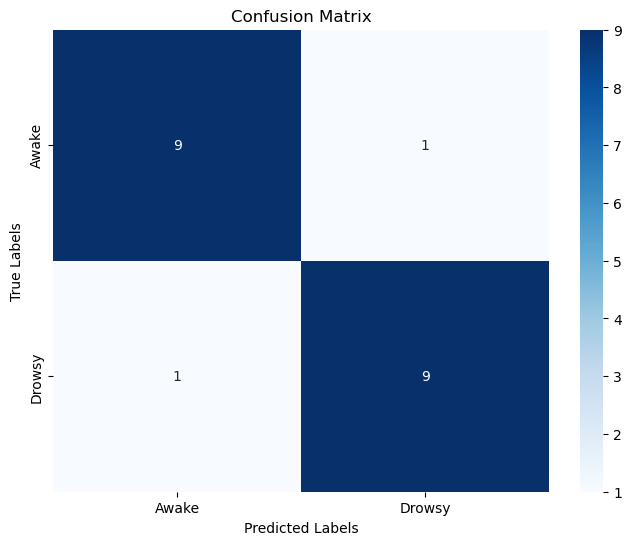

In [18]:
# Evaluate the model and get predictions
predicted_labels = []
true_labels = []

model_loaded.eval()

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model_loaded_comp(inputs)
        _, predicted = torch.max(outputs, 1)
        predicted_labels.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Awake', 'Drowsy'], yticklabels=['Awake', 'Drowsy'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()